In [112]:
import scipy.io as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs

In [113]:
### load INTERPSTACK
file_to_open_INTERPSTACK ='../../data/01_spatial/INTERPSTACK_sep2021_v5.mat'
file_to_open_FLORA ='../../data/01_spatial/FLORA_biome.mat'
mat_contents_INTERP = sp.loadmat(file_to_open_INTERPSTACK)
mat_contents_FLORA = sp.loadmat(file_to_open_FLORA)

CO2 = mat_contents_INTERP['INTERPSTACK'][0][0][0][0]
interp_time = mat_contents_INTERP['INTERPSTACK'][0][0][1][0]
Tair = mat_contents_INTERP['INTERPSTACK'][0][0][2]
runoff = mat_contents_INTERP['INTERPSTACK'][0][0][3]
land = mat_contents_INTERP['INTERPSTACK'][0][0][4]
lat = mat_contents_INTERP['INTERPSTACK'][0][0][5]
biome = mat_contents_FLORA['biome']

for ind, bio in enumerate(biome_CO2):
    if ind >= 11:
        biome[:,:,ind] = np.roll(biome[:,:,ind], 24, axis=1)

/var/folders/gs/2q8t31qn5wjb02_tw8sm_c7h0000gn/T/ipykernel_58972/2566355065.py:4: RuntimeWarning: divide by zero encountered in log
  ax3.imshow(np.log(runoff[:,:,7,-1]))


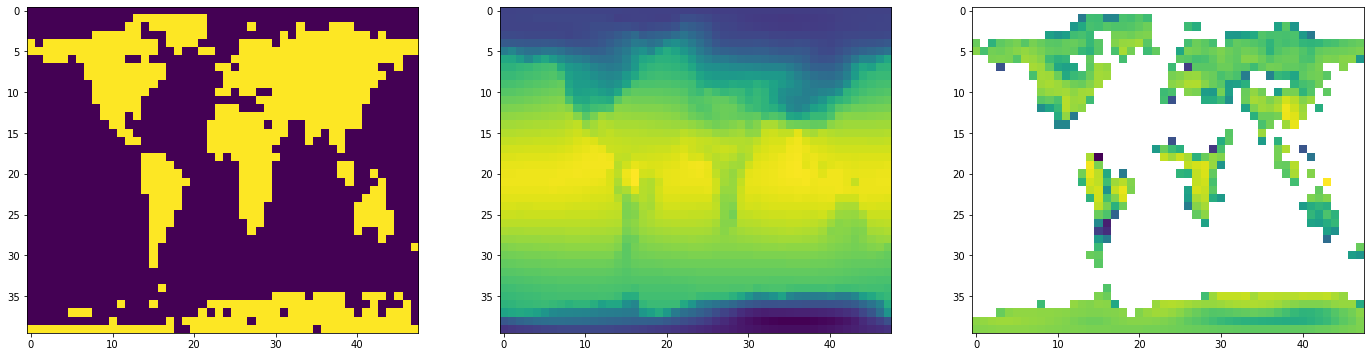

In [126]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,6))
ax1.imshow(land[:,:,timestep])
ax2.imshow(Tair[:,:,7,-1])
ax3.imshow(np.log(runoff[:,:,7,-1]))

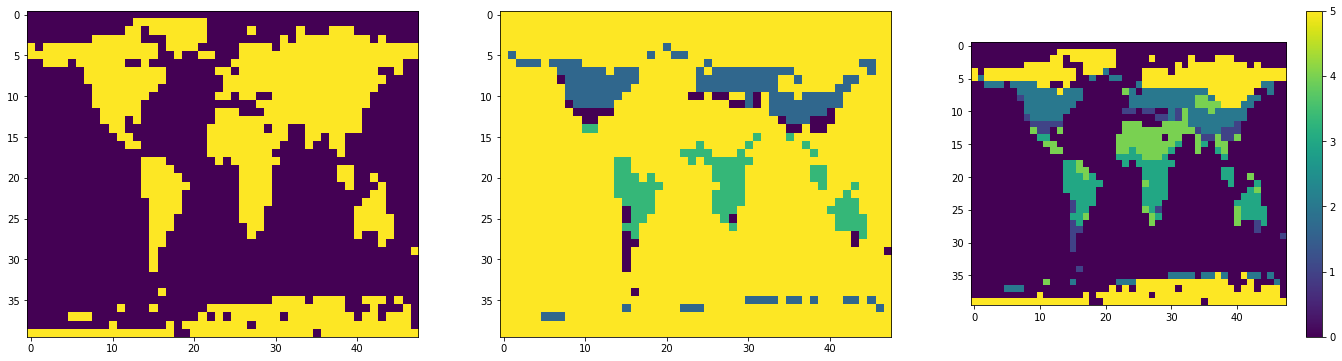

In [117]:
biome_CO2 = np.asarray([21, 19, 19, 18,	17,	16,	15,	12,	11,	12,	12,	14,	16,	16,	16,	13,	14,	11,	12,	11,	9,	8]) #matlab outputs
biome_CO2 = biome_CO2 - 1
timestep = -1
time_CO2 = 7

ice_limit_temp = -10
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=3, figsize=(24,6))
biome_land_sea[:,:,timestep] = np.copy(land[:,:,timestep]*biome[:,:,timestep])
biome_land_sea[:,:,timestep][(Tair[:,:,time_CO2,timestep] < ice_limit_temp) & (biome_land_sea[:,:,timestep] == 4)] = 5
ax1.imshow(land[:,:,timestep])
ax2.imshow(biome[:,:,timestep])
cax = ax3.imshow(biome_land_sea[:,:,timestep])
fig.colorbar(cax)

#1 boreal == podzel (thin and nothing grows)
#2 temperate == deep soils with well defined horizons (most fertile)
#3 tropical == clay (thin) very weathered
#4 arid == evaporite
#5 ice/tundra == Gelisols, permafrost

In [133]:
present_day_biome = biome_land_sea[:,:,-1]
np.savetxt('../../data/01_spatial/present_da')

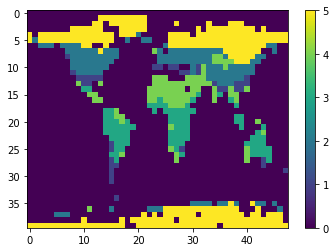

In [135]:
plt.imshow(present_dat_biome)
plt.colorbar()

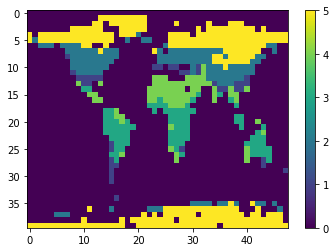

In [94]:
timestep = -1
biome_land_sea[:,:,timestep] = np.copy(land[:,:,timestep]*biome[:,:,timestep])
biome_land_sea[:,:,timestep][(Tair[:,:,time_CO2,timestep] < ice_limit_temp) & (biome_land_sea[:,:,timestep] == 4)] = 5
plt.imshow(biome_land_sea[:,:,timestep])
plt.colorbar()

/var/folders/gs/2q8t31qn5wjb02_tw8sm_c7h0000gn/T/ipykernel_58972/1226470831.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12,6))


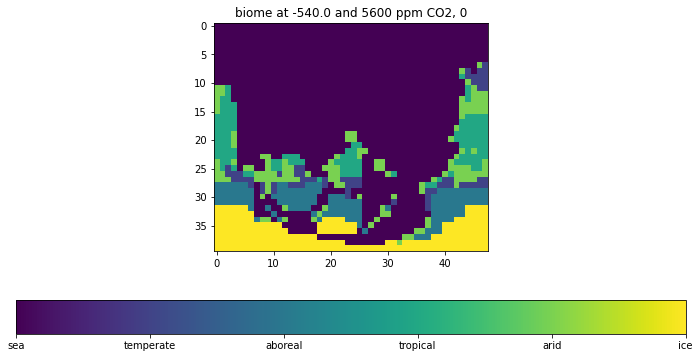

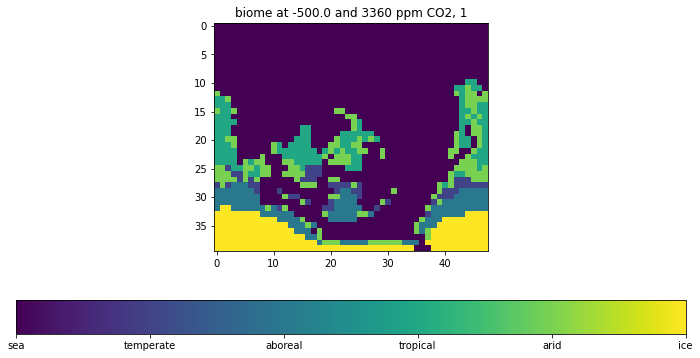

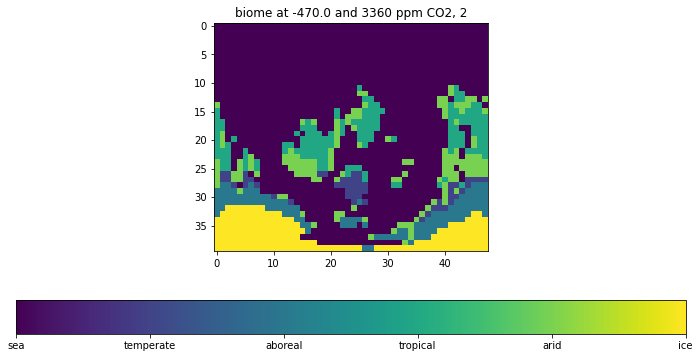

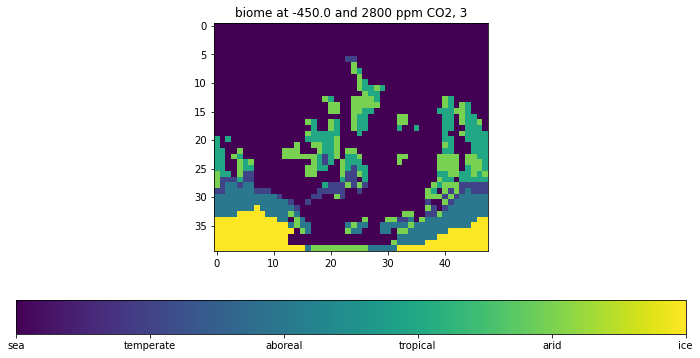

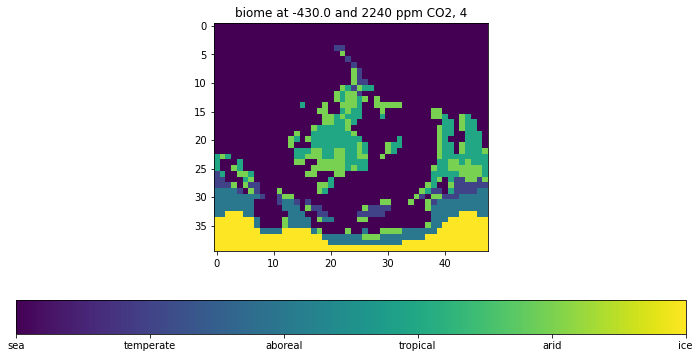

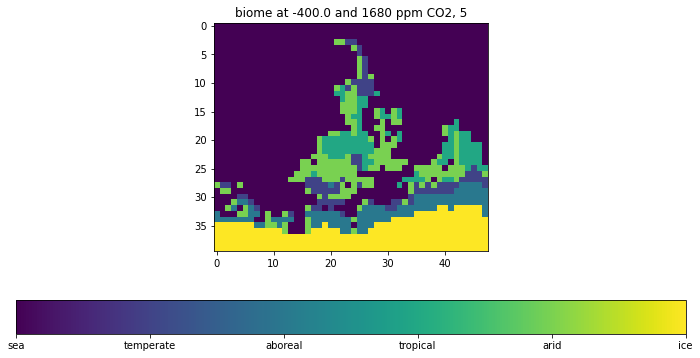

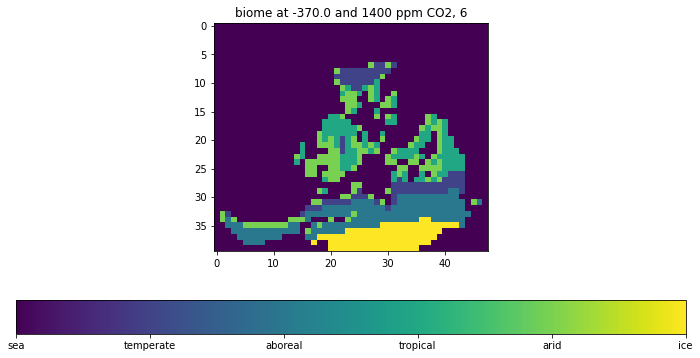

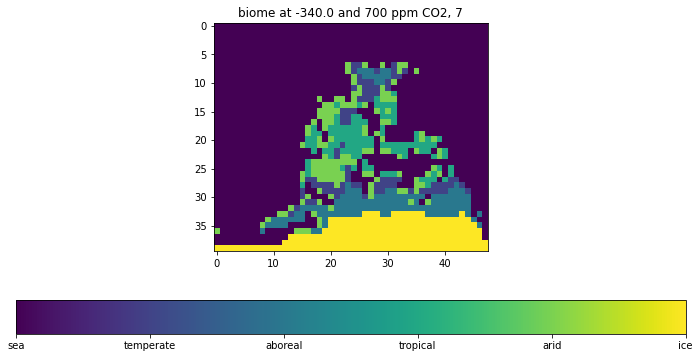

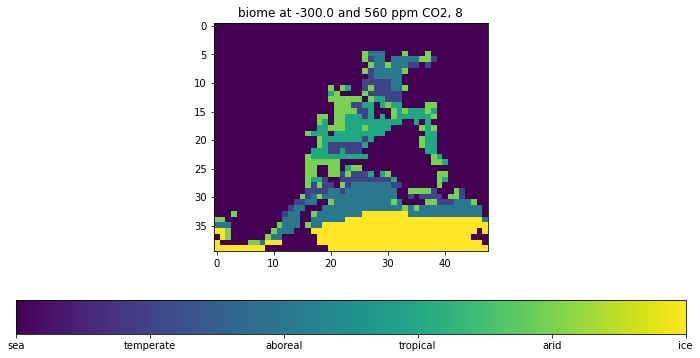

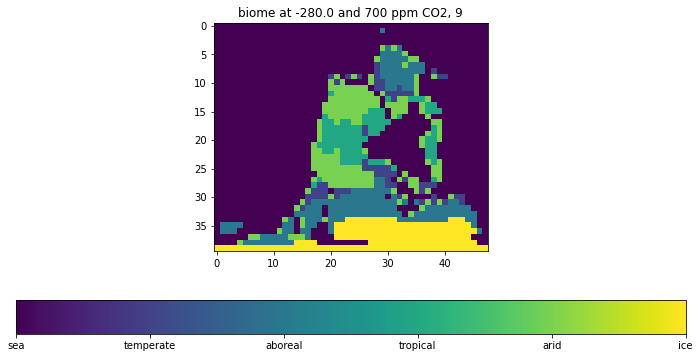

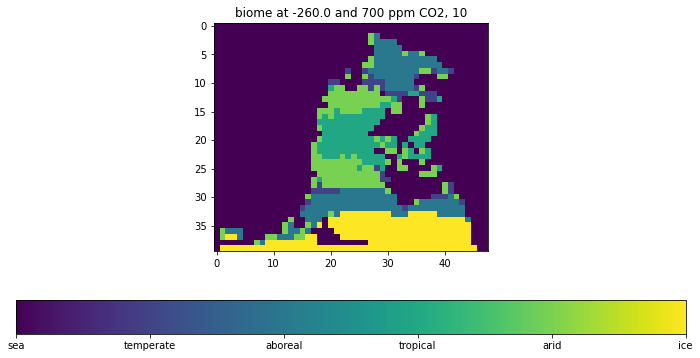

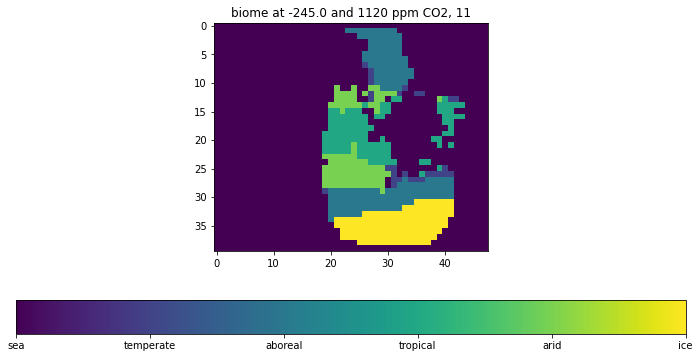

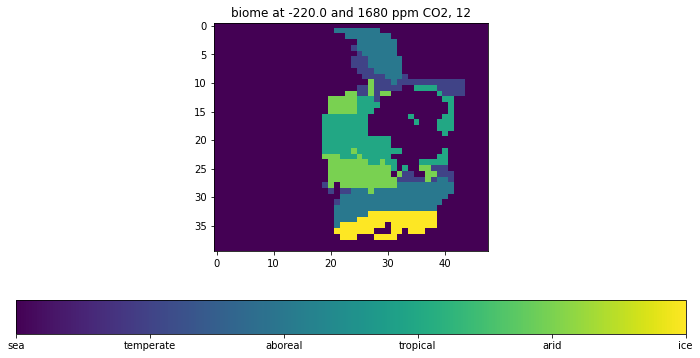

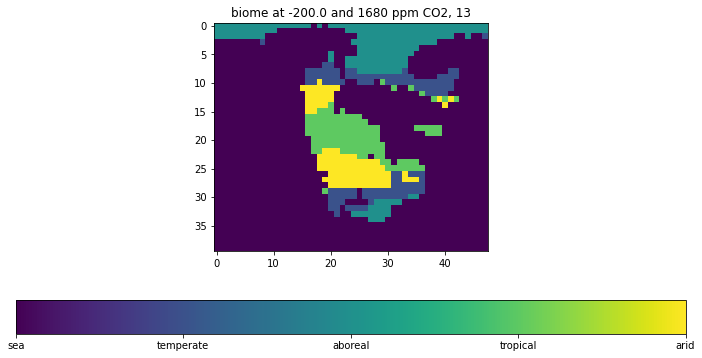

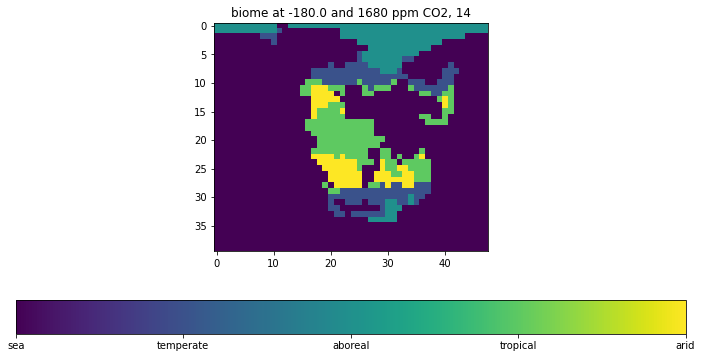

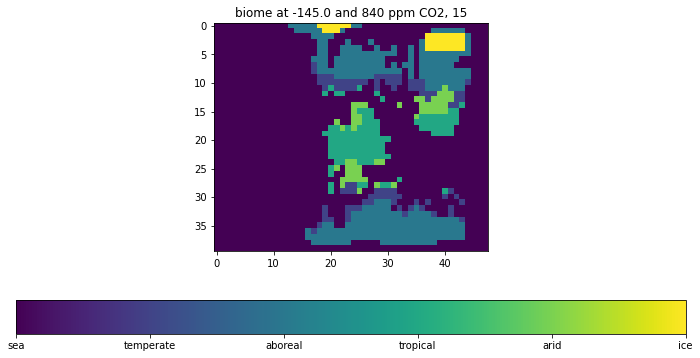

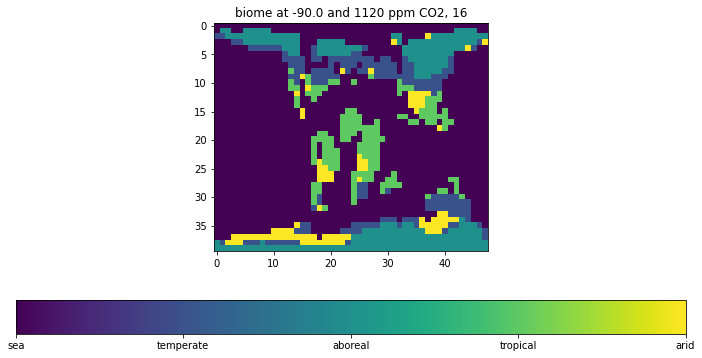

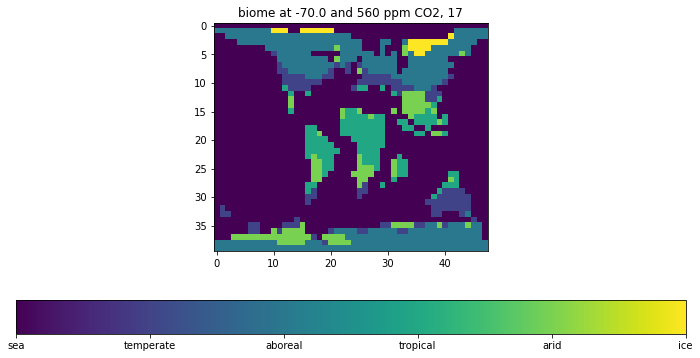

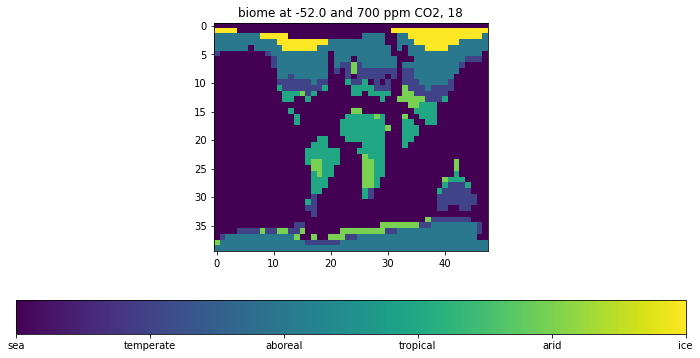

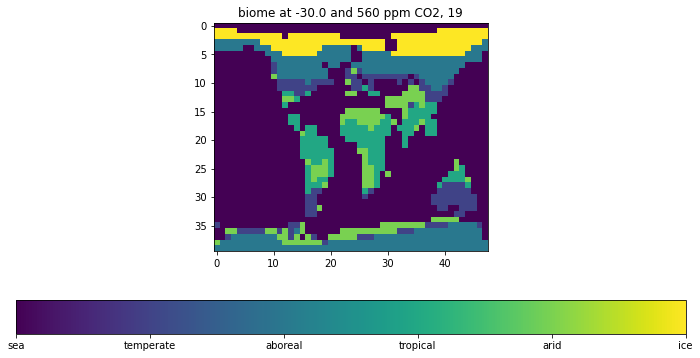

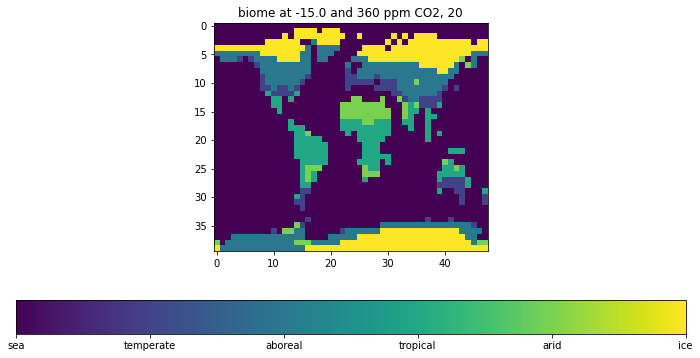

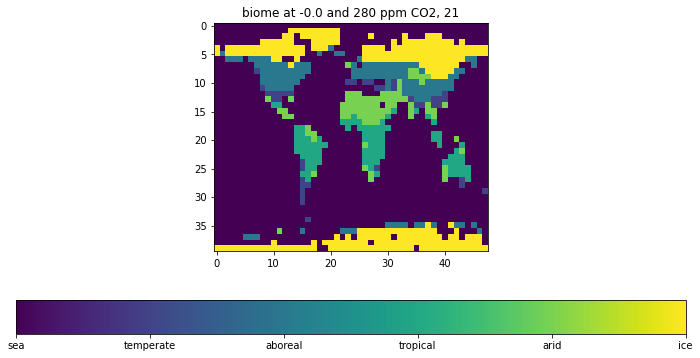

In [132]:
biome_CO2 = np.asarray([21, 19, 19, 18,	17,	16,	15,	12,	11,	12,	12,	14,	16,	16,	16,	13,	14,	11,	12,	11,	9,	8]) #matlab outputs
biome_CO2 = biome_CO2 - 1

ice_limit_temp = -10
biome_land_sea = np.copy(land)
#labels = ['sea', 'temperate', 'aboreal', 'tropical', 'leftover', 'ice', 'tundra', 'desert']
for timestep, time_CO2 in enumerate(biome_CO2[:]):
    biome_land_sea[:,:,timestep] = land[:,:,timestep]*biome[:,:,timestep]
    biome_land_sea[:,:,timestep][(Tair[:,:,time_CO2,timestep] < ice_limit_temp) & (biome_land_sea[:,:,timestep] == 4)] = 5

    
    fig, ax = plt.subplots(figsize=(12,6))
    cax = ax.imshow(biome_land_sea[:,:,timestep])
    cbar = fig.colorbar(cax, ticks=[0,1,2,3,4,5], orientation='horizontal')
    cbar.ax.set_xticklabels(['sea', 'temperate', 'aboreal', 'tropical', 'arid', 'ice'])  # horizontal colorbar
    #fig.colorbar(cax)
    ax.set_title(f'biome at {interp_time[timestep]} and {CO2[time_CO2]} ppm CO2, {timestep}')